In [1]:
import os
import glob
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import csv 
import pandas as pd
import numpy as np
%matplotlib inline
from pandas import DataFrame, read_csv
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import scipy.special as sse
from scipy.stats import chisquare


//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
cd /Users/austinmcdonald/Desktop

/Users/austinmcdonald/Desktop


In [5]:
os.listdir()

['research',
 'MobilityPaper-6.pdf',
 'Scary-Doll.jpg',
 '.DS_Store',
 'Radiation Detection and Measurement.pdf',
 'TapTalkPhoto.jpg',
 'test',
 'Screen Shot 2018-10-09 at 1.14.53 PM.png',
 'Screen Shot 2018-09-18 at 9.02.50 PM.png',
 '.localized',
 '101918-rga-n2-period.txt',
 'periodic table.png',
 'DMB-xe.pdf',
 '101918-rga-all-period.txt',
 'Screen Shot 2018-09-11 at 9.59.01 PM.png',
 'Screen Shot 2018-10-10 at 1.52.43 PM.png',
 'Ultra high level liquid argon purification using electron emission from a tip array.pdf',
 "Austin's",
 'Screen Shot 2018-10-09 at 12.59.44 PM.png',
 'Measurements of the lifetime of conduction electrons in liquid xenon.pdf',
 'Cluster ions in gas-based detectors.pdf',
 'data',
 'phy-fun.jpg',
 'Purity-mon']

In [6]:
f = open('101918-rga-all-period.txt', 'r')
for line in f:
    print(repr(line))

'Oct 19, 2018  01:17:28 PM\n'
'Residual Gas Analyzer Software \n'
'RGA Software Version, 3.218.004\n'
'\n'
'Pressure vs Time Scan Setup:\n'
'\n'
'Active channels in Scan, 4 \n'
'Units, Torr\n'
'Sample Period, 1.00, sec\n'
'Focus Voltage, 90, Volts \n'
'Ion Energy, HIGH \n'
'Electron Energy, 70, eV \n'
'CEM Voltage, 1160, Volts\n'
'CEM Gain, 1.03E+003 \n'
'Sensitivity Factor, 8.31E-005 \n'
'Filament Current, 1.00, mAmps\n'
'Start time, Oct 19, 2018  01:17:28 PM \n'
'Channel,  Mass(amu),     Name,                 Cal Factor,  Noise Floor, CEM Status\n'
'\n'
'1         28.00          Nitrogen              1.00         3            OFF\n'
'2         32.00          Oxygen                1.00         3            OFF\n'
'3         18.00          Water                 1.00         3            OFF\n'
'4         40.00          Argon                 1.00         3            OFF\n'
'\n'
'\n'
'Time(s)      Channel#1   Channel#2   Channel#3   Channel#4   \n'
'\n'
'0.000,   3.4506E-006,   6.2738E-

In [26]:
Time=[]
N2=[]
Ar=[]
O2=[]
H2O=[]
f = open('101918-rga-all-period.txt', 'r')
for line in f:
    line = line.strip()
    columns = line.split(',')
    if len(columns) == 6:
        Time.append(columns[0])
        N2.append(columns[1])
        Ar.append(columns[4])
        O2.append(columns[2])
        H2O.append(columns[3])
Time=Time[1:]
N2=N2[1:]
Ar=Ar[1:]
O2=O2[1:]
H2O=H2O[1:]
[float(i) for i in Time]
[float(i) for i in N2]
[float(i) for i in Ar]
[float(i) for i in O2]
[float(i) for i in H2O]
Time = np.array(Time).astype(float)
N2 = np.array(N2).astype(float)
Ar = np.array(Ar).astype(float)
O2 = np.array(O2).astype(float)
H2O = np.array(H2O).astype(float)


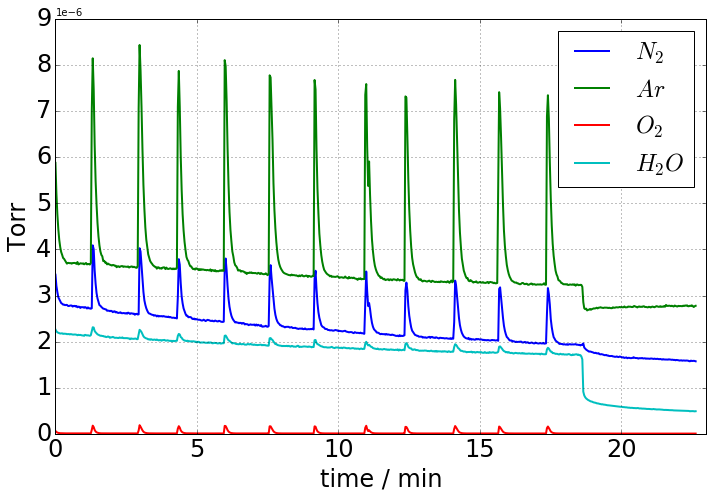

In [33]:
plt.figure(figsize=(10,7))
plt.plot(Time/60,N2,linewidth=2,label=r'$N_2$')
plt.plot(Time/60,Ar,linewidth=2,label=r'$Ar$')
plt.plot(Time/60,O2,linewidth=2,label=r'$O_2$')
plt.plot(Time/60,H2O,linewidth=2,label=r'$H_2O$')
plt.legend(loc='upper right',fontsize=24)
plt.xlabel('time / min',fontsize=24)
plt.ylabel('Torr',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ticklabel_format(axis='y',style='sci',scilimits=(1,6))

plt.xlim(0,23)
#plt.ylim(0,8e-6)
plt.grid()
plt.tight_layout()

#plt.savefig('Rga-all.png')
plt.show()

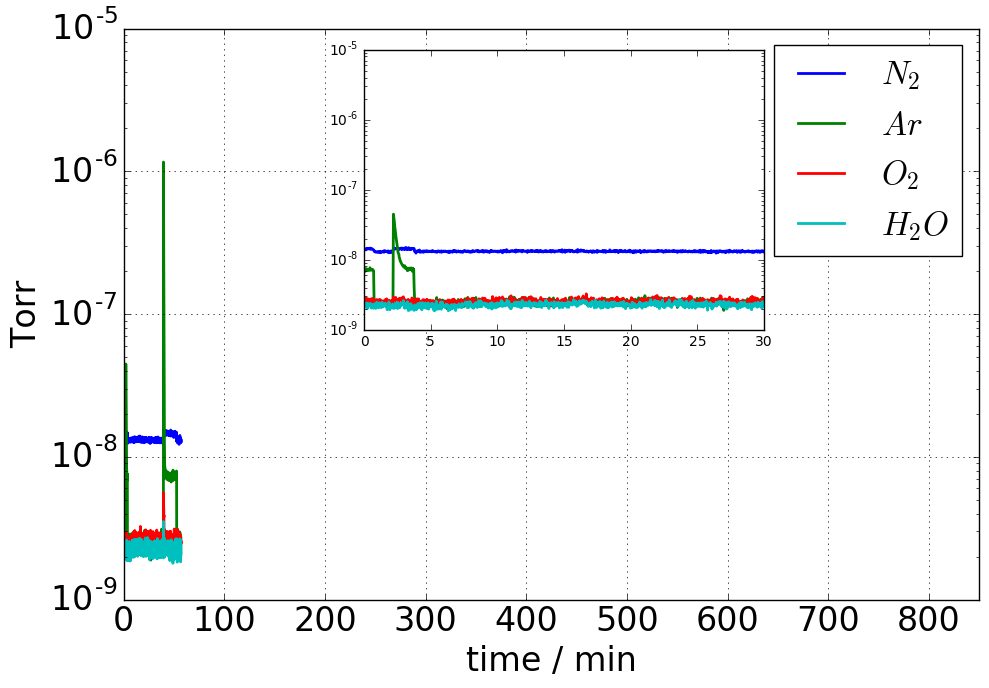

In [8]:
plt.figure(figsize=(10,7))
plt.semilogy(Time/60,N2,linewidth=2,label=r'$N_2$')
plt.semilogy(Time/60,Ar,linewidth=2,label=r'$Ar$')
plt.semilogy(Time/60,O2,linewidth=2,label=r'$O_2$')
plt.semilogy(Time/60,H2O,linewidth=2,label=r'$H_2O$')
plt.legend(loc='upper right',fontsize=24)
plt.xlabel('time / min',fontsize=24)
plt.ylabel('Torr',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(0,850)
#plt.ylim(5e-9,1e-6)
plt.grid()
plt.tight_layout()

a=plt.axes([.37,.52,.4,.4])
plt.semilogy(Time/60,N2,linewidth=2,label=r'$N_2$')
plt.semilogy(Time/60,Ar,linewidth=2,label=r'$Ar$')
plt.semilogy(Time/60,O2,linewidth=2,label=r'$O_2$')
plt.semilogy(Time/60,H2O,linewidth=2,label=r'$H_2O$')
plt.xlim(0,30)


#plt.savefig('Rga-N2_vs_time-plt.pdf')
plt.show()

In [41]:
N2TOT = sum(N2.astype(float))
ArTOT = sum(Ar.astype(float))
print(N2TOT)
print(ArTOT)

0.067846010206
0.0002675265139


In [40]:
N2TOT/ArTOT

253.60480805038998

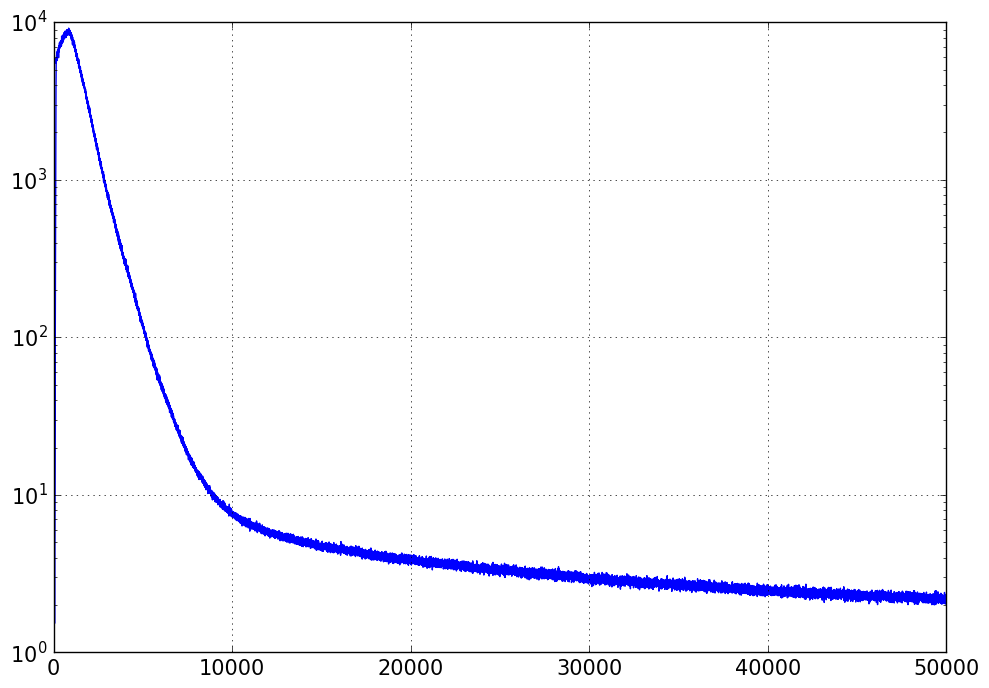

In [80]:
plt.figure(figsize=(10,7))
plt.semilogy(Time,N2.astype(float)/Ar.astype(float))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.xlim(0,50000)
#plt.ylim(5e-9,1e-6)
plt.grid()

#plt.ylim(1e-10,4e-6)
plt.show()